In [24]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler 

import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [25]:
df = pd.read_csv('students_clean.csv')
df.head()

,Hours_Study,Attendance,Sleep_Hours,Previous_Score,Final_Score
0,4.745071,69.055723,7.938284,71.502694,99.721205
1,3.792604,79.006250,6.483955,64.847134,101.730883
2,4.971533,85.052437,7.096121,71.467570,102.778536
3,6.284545,85.469806,6.537725,76.519576,108.032792
4,3.648770,80.499345,6.565504,70.586321,96.215130


In [26]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Study     400 non-null    float64
 1   Attendance      400 non-null    float64
 2   Sleep_Hours     400 non-null    float64
 3   Previous_Score  400 non-null    float64
 4   Final_Score     400 non-null    float64
dtypes: float64(5)
memory usage: 15.8 KB


In [27]:
# summary statistics
df.describe()

,Hours_Study,Attendance,Sleep_Hours,Previous_Score,Final_Score
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,4.035978,84.306649,7.130942,70.520842,102.736340
std,1.433744,9.450041,0.992581,12.106373,10.342241
min,0.000000,58.031134,4.103745,34.943794,74.415328
25%,3.016835,77.497894,6.469099,62.099249,95.548278
50%,4.088829,84.661291,7.158436,70.361112,102.902609
75%,4.946052,91.220700,7.794471,78.180650,109.589144
max,9.779097,100.000000,9.526932,100.000000,132.560748


In [28]:
# duplication 
df.duplicated().sum()

np.int64(0)

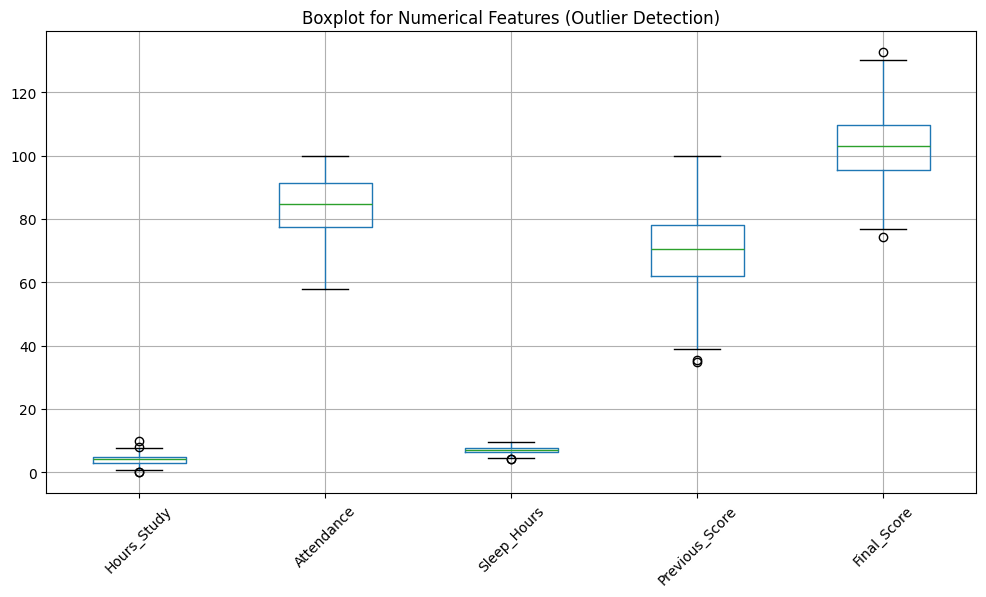

In [29]:
num_cols = df.select_dtypes(include=["float64"]).columns

plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for Numerical Features (Outlier Detection)")
plt.show()

- Normal distribution
- 75% study in 5 hours
- Outliers in 4 features
- No Categorical
- No duplication

# Spliting 

In [30]:
# spliting data
X = df.drop('Final_Score', axis=1)
y = df['Final_Score']

In [31]:
# Train & Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [32]:
scaler = RobustScaler()

# Fit on training data
scaler.fit(X_train)

# Transform both training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Training & Evaluation

## Linear Regression

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print Linear Regression performance
print("=" * 50)
print("Linear Regression Performance:")
print("=" * 50)
print(f"MAE: {mae_lr} \nMSE: {mse_lr} \nRMSE: {rmse_lr} \nR2: {r2_lr}")

Linear Regression Performance:
MAE: 3.7585265959438643 
MSE: 21.661956805265206 
RMSE: 4.654240733488676 
R2: 0.8456176655001264


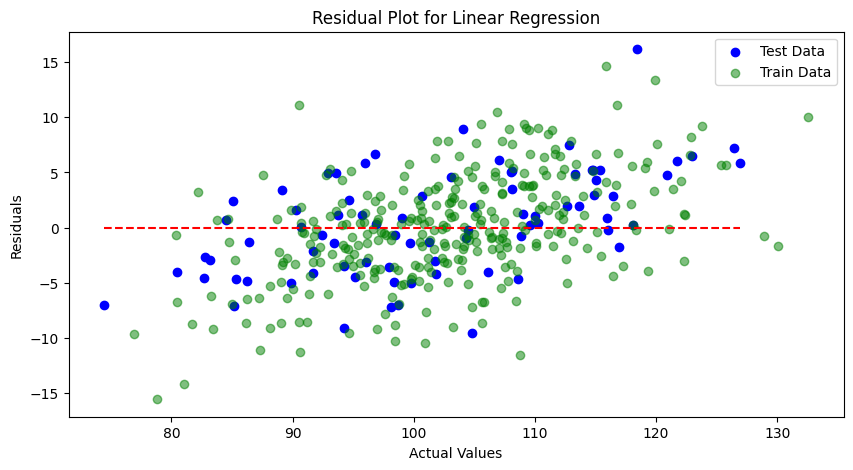

In [ ]:
# Residual Plot for Linear Regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test - y_pred_lr, color='blue', label='Test Data')
y_train_pred_lr = lr_model.predict(X_train)
plt.scatter(y_train, y_train - y_train_pred_lr, color='green', label='Train Data', alpha=0.5)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='red', linestyles='dashed')
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

## Decision Tree

In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt_model.fit(X_train, y_train)
# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# evaluate Decision Tree Regressor
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# print Decision Tree Regressor performance
print("=" * 50)
print("Decision Tree Regressor Performance:")
print("=" * 50)
print(f"MAE: {mae_dt} \nMSE: {mse_dt} \nRMSE: {rmse_dt} \nR2: {r2_dt}")


Decision Tree Regressor Performance:
MAE: 5.5153862049668225 
MSE: 49.26021886266383 
RMSE: 7.018562449865629 
R2: 0.6489279498450351


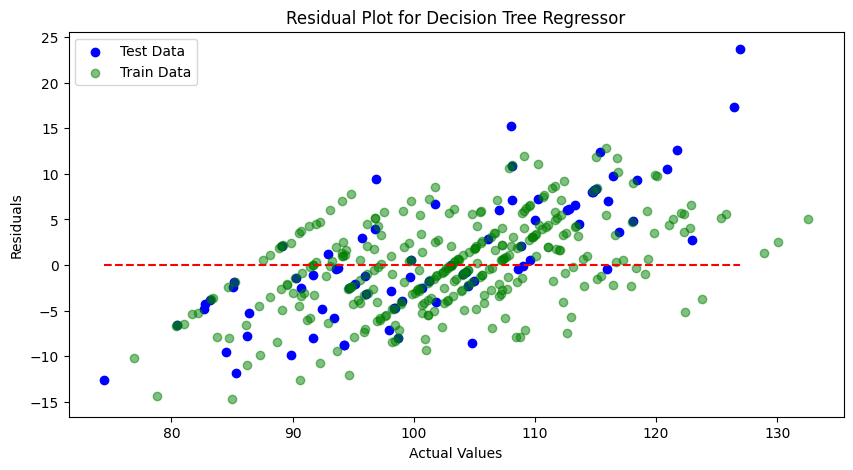

In [ ]:
# Residual Plot for Decision Tree Regressor
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test - y_pred_dt, color='blue', label='Test Data')
y_train_pred_dt = dt_model.predict(X_train)
plt.scatter(y_train, y_train - y_train_pred_dt, color='green', label='Train Data', alpha=0.5)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='red', linestyles='dashed')
plt.title('Residual Plot for Decision Tree Regressor')

plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

## KNN

In [ ]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# evaluate KNN Regressor
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# print KNN Regressor performance
print("=" * 50)
print("KNN Regressor Performance:")
print("=" * 50)
print(f"MAE: {mae_knn} \nMSE: {mse_knn} \nRMSE: {rmse_knn} \nR2: {r2_knn}")

KNN Regressor Performance:
MAE: 5.229264715934759 
MSE: 42.91236382994833 
RMSE: 6.550752920844163 
R2: 0.6941684000881632


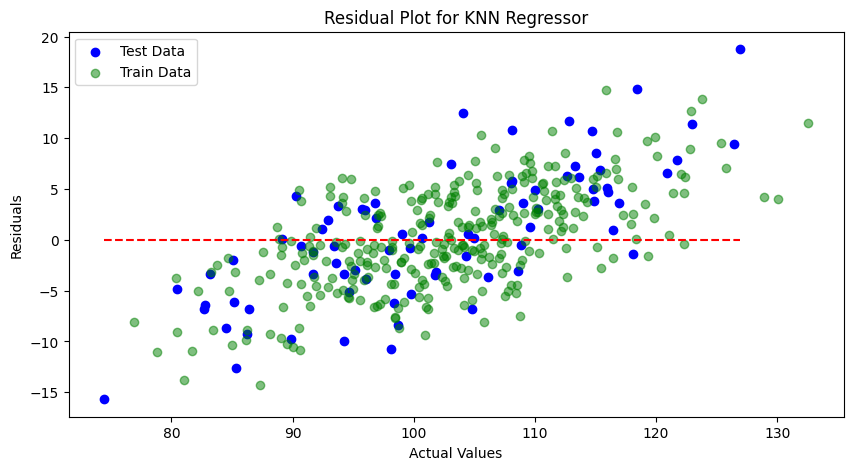

In [38]:
# visualize Residuals for KNN Regressor
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test - y_pred_knn, color='blue', label='Test Data')
y_train_pred_knn = knn_model.predict(X_train)
plt.scatter(y_train, y_train - y_train_pred_knn, color='green', label='Train Data', alpha=0.5)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='red', linestyles='dashed')
plt.title('Residual Plot for KNN Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [39]:
# Comapererison of all models
performance_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'KNN Regressor'],
    'MAE': [mae_lr, mae_dt, mae_knn],
    'MSE': [mse_lr, mse_dt, mse_knn],
    'RMSE': [rmse_lr, rmse_dt, rmse_knn],
    'R2 Score': [r2_lr, r2_dt, r2_knn]
})
print(performance_df)

                     Model       MAE        MSE      RMSE  R2 Score
0        Linear Regression  3.758527  21.661957  4.654241  0.845618
1  Decision Tree Regressor  5.515386  49.260219  7.018562  0.648928
2            KNN Regressor  5.229265  42.912364  6.550753  0.694168
